##Mounting Google Drive

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing Essential Libraries

In [24]:
import tweepy as tw
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math
import itertools
import time
import os

##Exploring the dataset

In [32]:
activity_data_path = r'/content/drive/My Drive/NAM/higgs.txt'
social_network_path = r'/content/drive/My Drive/NAM/Project/social_network.edgelist'

In [33]:
with open(activity_data_path, 'r') as f:
    activity_tuple_list = [tuple(x.split()) for x in f]

In [34]:
from collections import defaultdict
activity_type_dict = defaultdict(list)

In [35]:
for tup in activity_tuple_list:
    activity_type_dict[tup[3]].append([tup[0], tup[1]])

In [36]:
activity_type_dict.keys()

dict_keys(['MT', 'RE', 'RT'])

In [37]:
G_MT = nx.DiGraph()
G_RE = nx.DiGraph()
G_RT = nx.Graph()
G = nx.DiGraph()
G_MT.add_edges_from(activity_type_dict['MT'])
G_RE.add_edges_from(activity_type_dict['RE'])
G_RT.add_edges_from(activity_type_dict['RT'])
G.add_edges_from(activity_type_dict['RT'])

##Since retweets in a network show diffusion of information, we further explore the retweets network.

In [38]:
G_RT.number_of_nodes()

2903

In [39]:
G.number_of_nodes()

2903

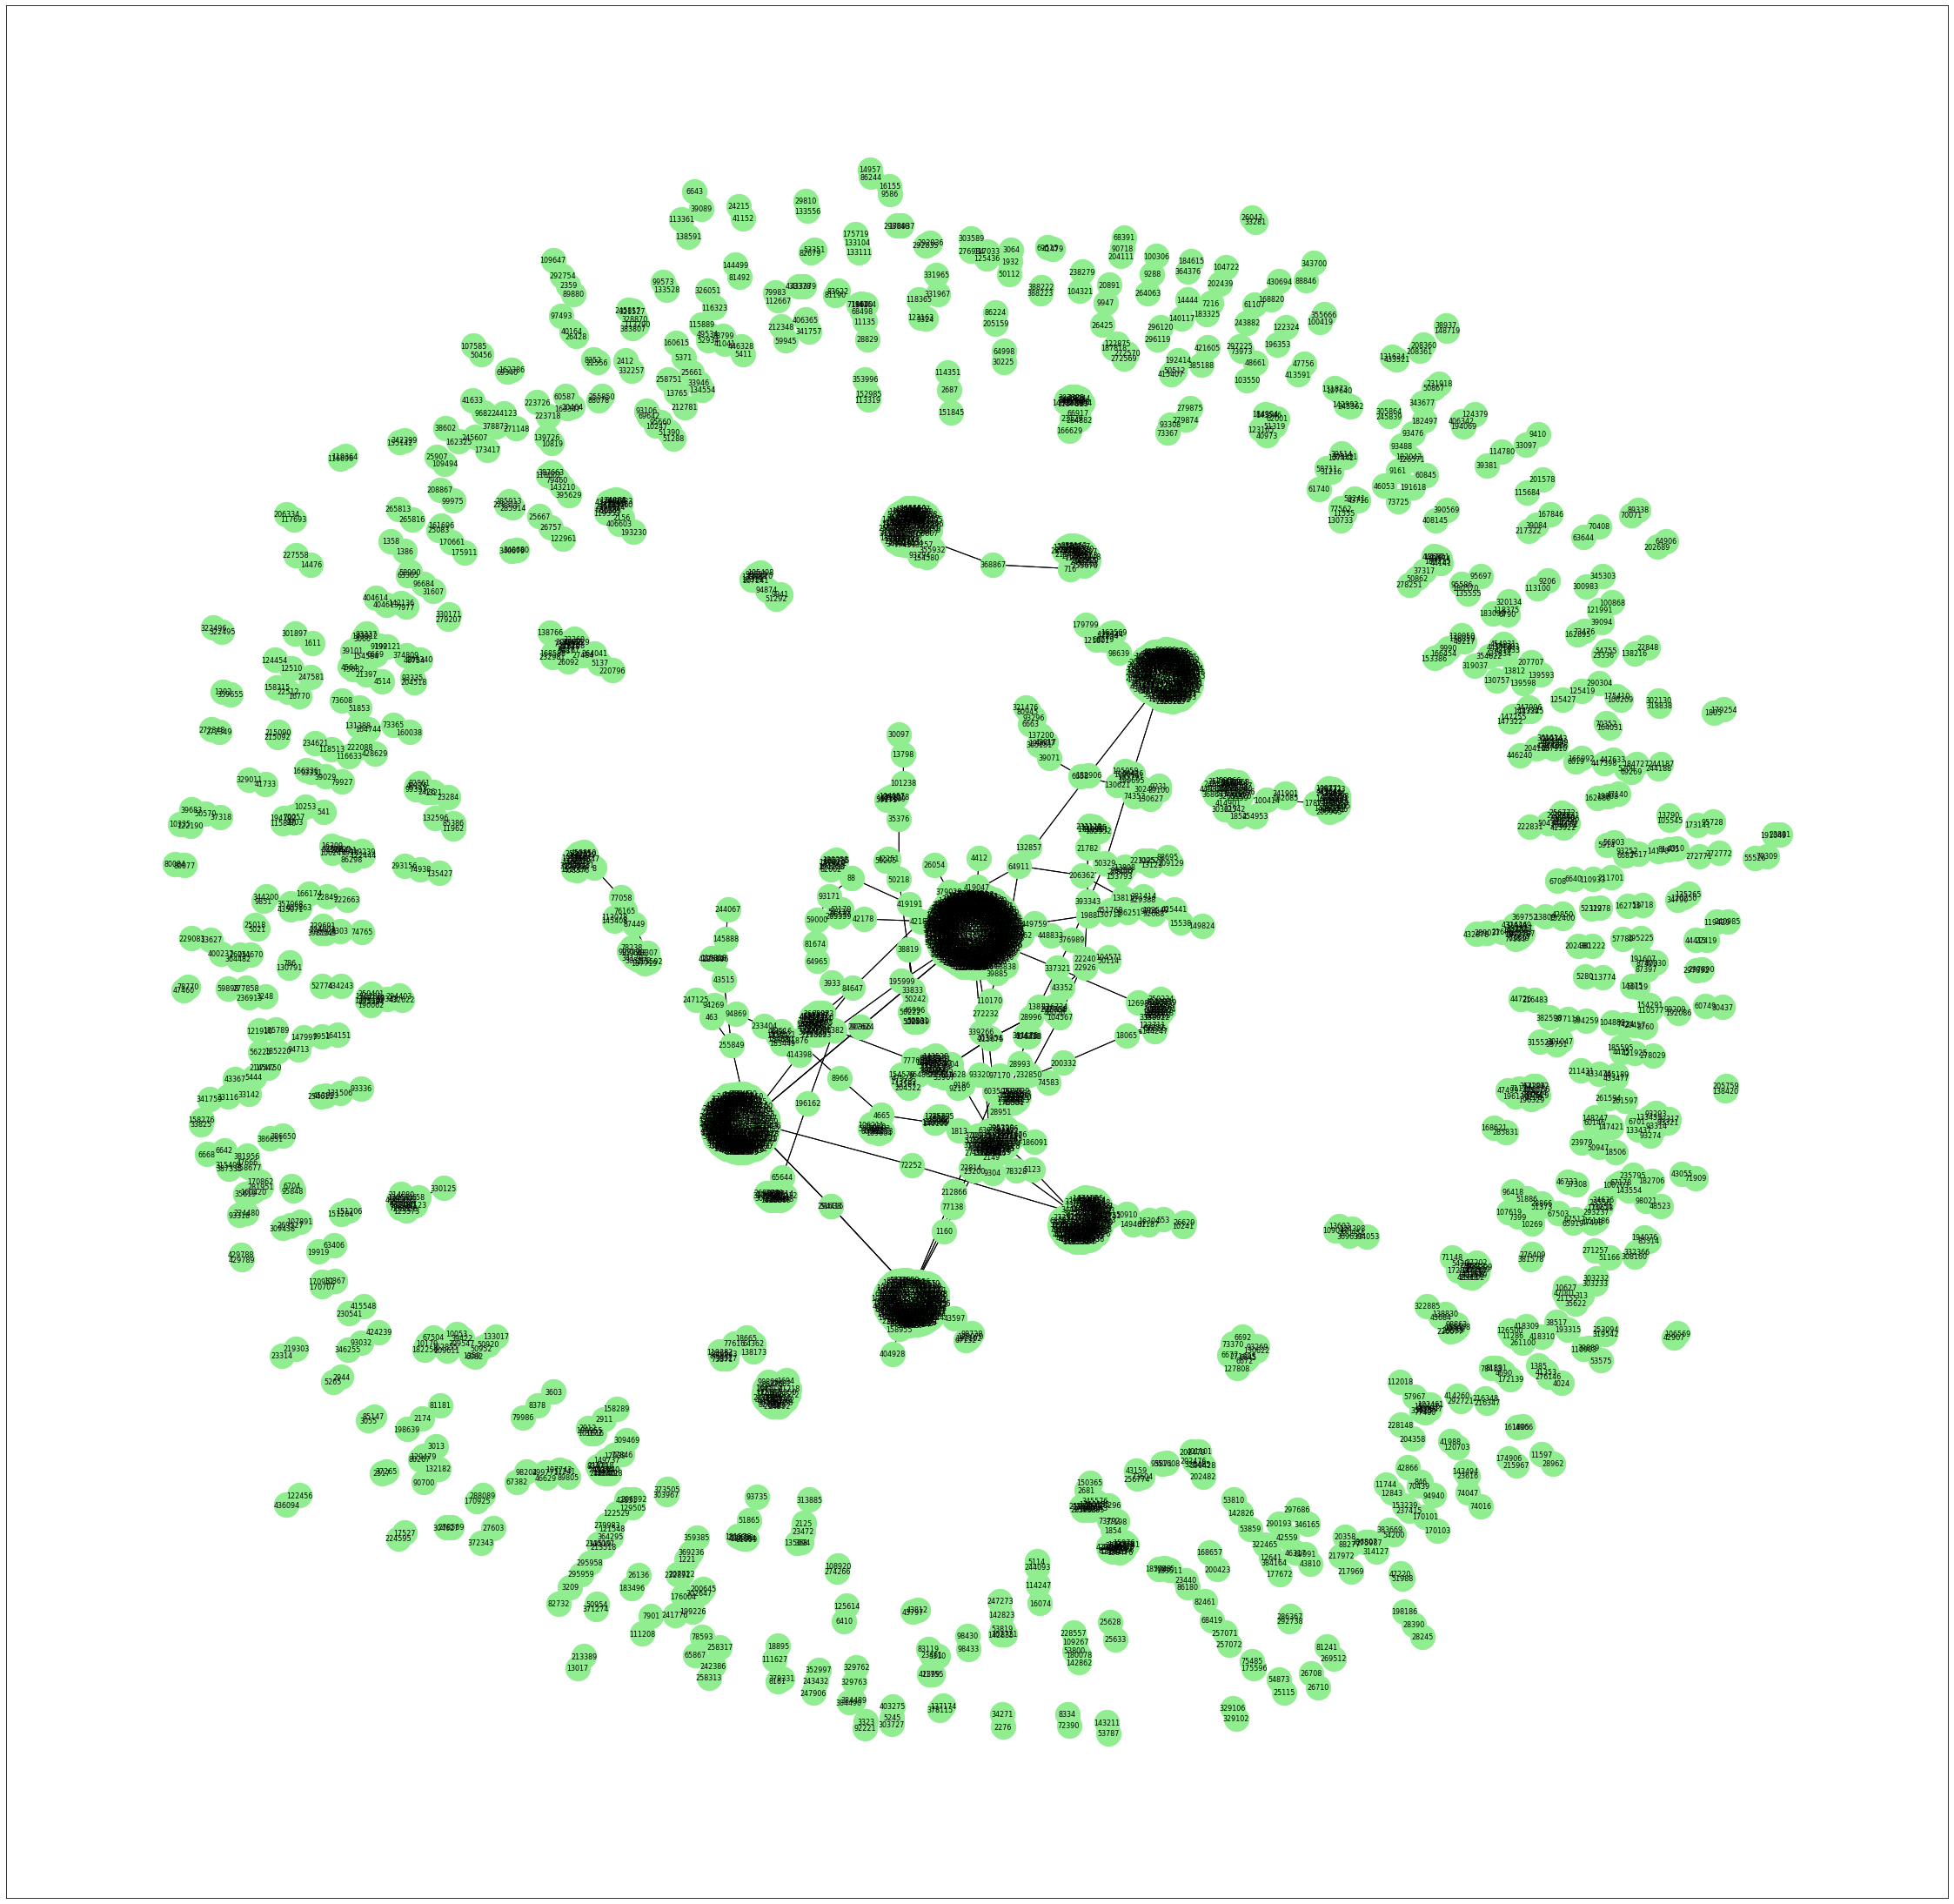

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(3, figsize=(40,40))
pos = nx.fruchterman_reingold_layout(G_RT)

nx.draw_networkx(G_RT, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G_RT, pos=pos)
edge_labels = nx.get_edge_attributes(G_RT, 'weight')
nx.draw_networkx_edge_labels(G_RT, pos=pos, edge_labels=edge_labels)
plt.show()
plt.savefig("1.jpg")

##Degree Centrality

In [41]:
from operator import itemgetter

In [42]:
degc = nx.degree_centrality(G_RT)
# let's list the scores
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist

[('250519', 0.16609235010337697),
 ('26486', 0.08235699517574087),
 ('6940', 0.06237077877325982),
 ('1134', 0.05892487939352171),
 ('38790', 0.041006202618883526),
 ('510', 0.025844245348035838),
 ('63931', 0.019297036526533425),
 ('27682', 0.00895933838731909),
 ('41382', 0.008614748449345278),
 ('716', 0.008270158511371467),
 ('519', 0.007925568573397657),
 ('17871', 0.007580978635423846),
 ('3604', 0.007236388697450034),
 ('8', 0.005858028945554789),
 ('65644', 0.005858028945554789),
 ('12698', 0.005858028945554789),
 ('1854', 0.005858028945554789),
 ('60350', 0.005513439007580979),
 ('2156', 0.004824259131633356),
 ('23129', 0.004824259131633356),
 ('5438', 0.004479669193659545),
 ('658', 0.004479669193659545),
 ('17939', 0.003790489317711923),
 ('27484', 0.003790489317711923),
 ('2681', 0.003790489317711923),
 ('4665', 0.0034458993797381117),
 ('7117', 0.0034458993797381117),
 ('21606', 0.0034458993797381117),
 ('11876', 0.0034458993797381117),
 ('50434', 0.0034458993797381117),


##Betweenness Centrality

In [43]:
bet = nx.betweenness_centrality(G_RT)
# let's list the scores
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist

[('250519', 0.1628150737847216),
 ('26486', 0.16221982272703786),
 ('84647', 0.06914476047891184),
 ('414398', 0.06729423767860318),
 ('42180', 0.0663042830117992),
 ('64911', 0.0654198236260174),
 ('6940', 0.06395974106222076),
 ('1134', 0.06380516891732266),
 ('182906', 0.059740325765183275),
 ('90366', 0.04749523295852642),
 ('297624', 0.04749523295852642),
 ('63931', 0.04678458434679397),
 ('38790', 0.04574892446659446),
 ('72252', 0.03261718515571234),
 ('339266', 0.028621763688315732),
 ('51638', 0.021856423834412636),
 ('294416', 0.021856423834412636),
 ('77138', 0.014394371366972414),
 ('41382', 0.013950183354623407),
 ('5123', 0.013376697330708634),
 ('195999', 0.01219623880260863),
 ('60350', 0.011987115870024432),
 ('3604', 0.009395471864638764),
 ('212866', 0.00788210063133325),
 ('272232', 0.0077861274229611005),
 ('337321', 0.005904473159876665),
 ('196162', 0.005904473159876665),
 ('65644', 0.00558946022795438),
 ('12698', 0.00558946022795438),
 ('11876', 0.0050710113427

##Closeness Centrality

In [44]:
clos = nx.closeness_centrality(G_RT)
# let's list the scores
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist

[('26486', 0.1381290376601377),
 ('90366', 0.13542403135310305),
 ('297624', 0.13542403135310305),
 ('250519', 0.13308088956768566),
 ('339266', 0.11979818158159115),
 ('51638', 0.1190602051036758),
 ('294416', 0.1190602051036758),
 ('414398', 0.11699055696280793),
 ('72252', 0.11661048244297208),
 ('272232', 0.11166965311279578),
 ('63931', 0.10905239561796463),
 ('255849', 0.10894206655750419),
 ('60201', 0.10869072220784017),
 ('42137', 0.10869072220784017),
 ('452671', 0.10869072220784017),
 ('170141', 0.10869072220784017),
 ('17600', 0.10869072220784017),
 ('4', 0.10869072220784017),
 ('329291', 0.10869072220784017),
 ('59072', 0.10869072220784017),
 ('118970', 0.10869072220784017),
 ('450774', 0.10869072220784017),
 ('78347', 0.10869072220784017),
 ('48985', 0.10869072220784017),
 ('22566', 0.10869072220784017),
 ('51652', 0.10869072220784017),
 ('268170', 0.10869072220784017),
 ('37240', 0.10869072220784017),
 ('6999', 0.10869072220784017),
 ('7394', 0.10869072220784017),
 ('167

In [45]:
print(nx.transitivity(G_RT))

0.00011022406978758247


##Clustering Co-efficient

In [46]:
local_clustering = (nx.clustering(G_RT))
local_clustering

{'376989': 0,
 '50329': 0,
 '13813': 0,
 '453850': 0,
 '8': 0,
 '99258': 0,
 '75083': 0,
 '84647': 0,
 '325821': 0,
 '104321': 0,
 '238279': 0,
 '408376': 0,
 '247125': 0,
 '463': 0,
 '224480': 0,
 '93318': 0,
 '47619': 0,
 '134554': 0,
 '33946': 0,
 '206362': 0,
 '64911': 0,
 '331967': 0,
 '331965': 0,
 '383669': 0,
 '54200': 0,
 '197097': 0,
 '519': 0,
 '416098': 0,
 '3604': 0,
 '318838': 0,
 '302130': 0,
 '446328': 0,
 '5411': 0,
 '75470': 0,
 '4665': 0,
 '50295': 0,
 '50218': 0,
 '38819': 0,
 '33833': 0,
 '130621': 0,
 '3024': 0,
 '247674': 0,
 '114351': 0,
 '2687': 0,
 '195886': 0,
 '50222': 0,
 '46996': 0,
 '34790': 0,
 '120250': 0,
 '207707': 0,
 '13812': 0,
 '162386': 0,
 '69340': 0,
 '445899': 0,
 '250401': 0,
 '59343': 0,
 '432622': 0,
 '82732': 0,
 '3209': 0,
 '147510': 0,
 '6669': 0,
 '9192': 0,
 '294403': 0,
 '3066': 0,
 '199121': 0,
 '175283': 0,
 '190062': 0,
 '33463': 0,
 '54873': 0,
 '25115': 0,
 '146847': 0,
 '38517': 0,
 '193315': 0,
 '47517': 0,
 '7117': 0,
 '121932

In [47]:
print(nx.average_clustering(G_RT))

0.0037896309684115398


In [48]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G_RT, 3))
c

[frozenset({'228311', '285913', '285914'}),
 frozenset({'121801', '66279', '98639'}),
 frozenset({'76165', '77058', '87449'}),
 frozenset({'22814', '271166', '63931', '77138'}),
 frozenset({'103447', '39885', '88838'}),
 frozenset({'202476', '202479', '325485'})]

##Average Shortest Path

In [49]:
for C in (G_RT.subgraph(c).copy() for c in nx.connected_components(G_RT)): 
    print(nx.average_shortest_path_length(C))

5.971016757122234
3.1011494252873564
1.0
1.0
1.0
1.0
1.0
3.036862745098039
1.0
1.0
3.3473684210526318
3.536842105263158
1.3333333333333333
1.3333333333333333
1.3333333333333333
1.0
1.7777777777777777
1.0
2.2142857142857144
1.0
1.0
1.9696969696969697
2.2222222222222223
1.0
1.0
1.3333333333333333
1.0
1.0
1.3333333333333333
2.25
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.7142857142857142
1.0
1.0
1.0
1.3333333333333333
1.5
1.3333333333333333
1.6
1.5
1.0
1.0
1.0
1.0
1.0
1.0
1.6666666666666667
1.0
1.0
1.0
1.3333333333333333
1.0
1.0
1.8666666666666667
1.9696969696969697
1.0
1.0
1.6
1.0
1.0
1.0
1.0
1.3333333333333333
1.0
1.0
1.8571428571428572
1.0
1.3333333333333333
1.5
1.0
1.0
1.0
1.6666666666666667
1.3333333333333333
1.3333333333333333
1.0
1.0
1.0
1.0
1.0
1.6666666666666667
1.0
1.0
1.0
1.0
1.0
1.0
1.3333333333333333
1.0
1.3333333333333333
1.0
1.0
1.5
1.5
1.0
1.0
1.0
1.5
1.3333333333333333
1.0
1.0
1.0
1.0
1.6666666666666667
1.3333333333333333
1.3333333333333333
1.0
1.3333333333333333
1.0
1

List of connected components

In [56]:
list(nx.connected_components(G_RT))

[{'22566',
  '44086',
  '36914',
  '94269',
  '444567',
  '73813',
  '74713',
  '235296',
  '233128',
  '1160',
  '176488',
  '50114',
  '73861',
  '42119',
  '148421',
  '214857',
  '250626',
  '242812',
  '454663',
  '282095',
  '35245',
  '324358',
  '191005',
  '75689',
  '133854',
  '399920',
  '350824',
  '197024',
  '404928',
  '261373',
  '430600',
  '79743',
  '273860',
  '111185',
  '192128',
  '10091',
  '210119',
  '28996',
  '52210',
  '315855',
  '64528',
  '2303',
  '224237',
  '61293',
  '255242',
  '108801',
  '172586',
  '169614',
  '295742',
  '126099',
  '160176',
  '123982',
  '76940',
  '11256',
  '1825',
  '381414',
  '255217',
  '4582',
  '22313',
  '443594',
  '387719',
  '452438',
  '409193',
  '221496',
  '371075',
  '18973',
  '103549',
  '46418',
  '159620',
  '110170',
  '8966',
  '163524',
  '158065',
  '26629',
  '65644',
  '311589',
  '42137',
  '167290',
  '85847',
  '305128',
  '400258',
  '207261',
  '221069',
  '302527',
  '143579',
  '444396',
  '6

Degree Distribution

In [57]:
N,K = G_RT.order(), G_RT.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  2903
Edges:  2529
Average degree:  0.8711677574922494


## Getting Top Active Users

In [ ]:
def get_top_users(G, degree='sum', n=10):
    if degree == 'sum':
        degree_collection = G.degree
    elif degree == 'in':
        degree_collection = G.in_degree
    elif degree == 'out':
        degree_collection = G.out_degree
    else:
        raise ValueError("Degree is not one of ['sum', 'in', 'out']")
        
    return sorted(degree_collection, key=lambda x: x[1], reverse=True)[:n]

In [ ]:
get_top_users(G, degree='in')

[('250519', 482),
 ('26486', 239),
 ('6940', 181),
 ('1134', 171),
 ('38790', 119),
 ('510', 75),
 ('63931', 56),
 ('27682', 26),
 ('41382', 25),
 ('716', 24)]

In [ ]:
get_top_users(G, degree='out')

[('206362', 3),
 ('38819', 3),
 ('6701', 3),
 ('77058', 3),
 ('42180', 3),
 ('232850', 3),
 ('386251', 3),
 ('255849', 3),
 ('77138', 3),
 ('303217', 3)]

In [ ]:
get_top_users(G_MT, degree='sum')

[('3369', 505),
 ('88', 299),
 ('4', 79),
 ('2417', 55),
 ('250519', 29),
 ('26486', 19),
 ('42', 18),
 ('3604', 17),
 ('383', 13),
 ('26139', 12)]

In [ ]:
get_top_users(G_RE, degree='sum')

[('3369', 11),
 ('677', 9),
 ('220', 6),
 ('6940', 6),
 ('13808', 4),
 ('10179', 4),
 ('26486', 4),
 ('88', 4),
 ('250519', 4),
 ('292035', 4)]

In [ ]:
get_top_users(G, degree='sum')

[('250519', 482),
 ('26486', 239),
 ('6940', 181),
 ('1134', 171),
 ('38790', 119),
 ('510', 75),
 ('63931', 56),
 ('27682', 26),
 ('41382', 25),
 ('716', 24)]

## Information Diffusion in the Network

In [ ]:
G_RT.remove_edges_from(nx.selfloop_edges(G_RT))

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

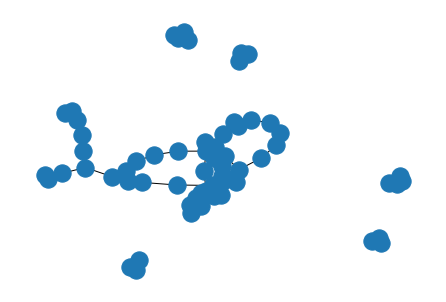

In [ ]:
ck = nx.k_core(G_RT, k=2, core_number=None)
nx.draw(ck)

The k-coreness of a vertex is the index of the highest k-core containing that vertex.

### The nodes with the highest k-coreness act as the most influential broadcasters of information in the network.
### This shows the relation between information diffusion and k-coreness to be positive.
### Thus, it shows that the "core" of the network is responsible for the chain of information diffusion.

## Visualizing an Epidemic Model for Information diffusion("Rumour Spread")

In [ ]:
!pip install EoN

     |████████████████████████████████| 113 kB 4.9 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=36bbe76bcbdb4348b2917f8af4c83bfc08560e640b87507cc765b5bf1cc4928f
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt 
import EoN
from collections import defaultdict

In [ ]:
nodes=G.number_of_nodes()
nodes

2903

In [ ]:
degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  376989  : Degree is  2
Node  50329  : Degree is  5
Node  13813  : Degree is  4
Node  453850  : Degree is  1
Node  8  : Degree is  17


0.009989665862900447

In [ ]:
no_nodes

2903

###Generative model based on the twitter network

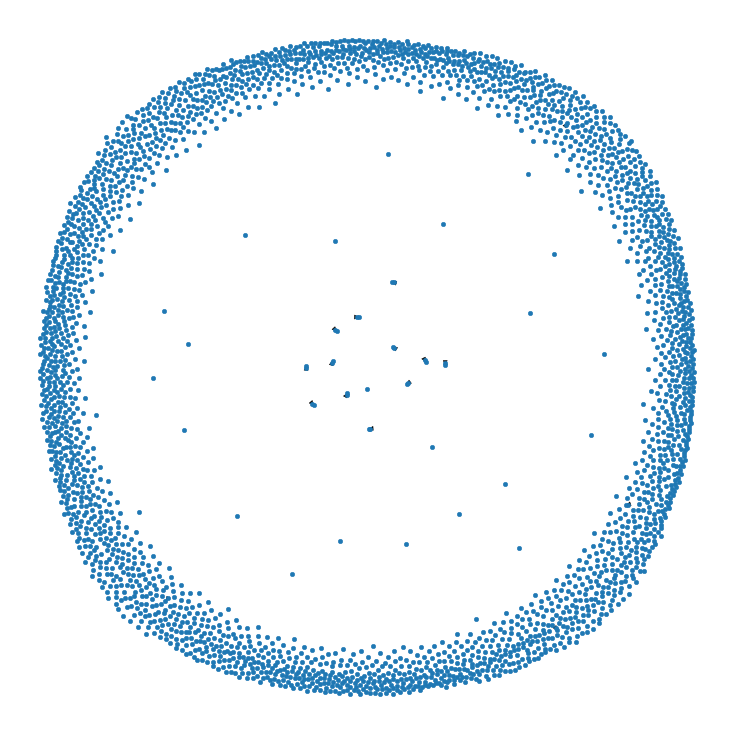

In [ ]:
p=avg_degree/(no_nodes-1)
G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
#G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

###Epidemic Model

doing Gillespie simulation
done with simulation, now plotting


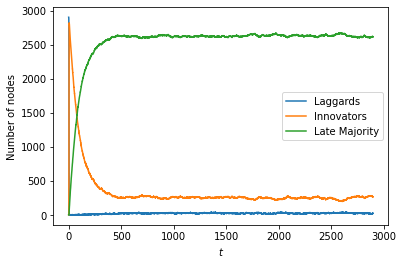

In [ ]:
a = 0.1
b = 0.01
y = 0.001
d = 0.001

# Simple contagions
# the below is based on an example of a SEIR disease (there is an exposed state before becoming infectious)
# from https://arxiv.org/pdf/2001.02436.pdf

Gnp = nx.gnp_random_graph(2903, 0.009989665862900447)

H = nx.DiGraph() #For the spontaneous transitions
H.add_edge('I', 'R', rate = b)  # an infected node can be recovered/removed
H.add_edge('I', 'S', rate = y)  # an infected node can become susceptible again
H.add_edge('R', 'S', rate = d)  # a recovered node can become suscepticle again

J = nx.DiGraph() #for the induced transitions
J.add_edge(('I', 'S'),('I', 'I'), rate = a)  # a susceptible node can become infected from a neighbour
IC = defaultdict(lambda: 'S')

# set all statuses except one to susceptible. only one node shall begin infected
for node in range(2903):
    IC[node] = 'S'
IC[0] = 'I'

return_statuses = ('S', 'I', 'R')
print('doing Gillespie simulation')

t, S, I, R = EoN.Gillespie_simple_contagion(Gnp, H, J, IC, return_statuses, tmax = 2900)

print('done with simulation, now plotting')
plt.plot(t, S, label = 'Laggards')
plt.plot(t, I, label = 'Innovators')
plt.plot(t, R, label = 'Late Majority')
plt.xlabel('$t$')
plt.ylabel('Number of nodes')
plt.legend()
plt.show()

## Laggards : Skeptical to change, won't do anything.
## Innovators : Start the spread of information(here tweets)
## Late Majority : Tweet only after it is tweeted by the majority(**Herding**)


##Link Prediction

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sp
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import pickle

In [ ]:
g = G_RT

In [ ]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# take a random sample of edges

proportion_edges = 0.2
edge_subset = random.sample(g.edges(), int(proportion_edges * g.number_of_edges()))

# remove some edges. the goal is to try and repredict these edges, and measure how close the prediction is to the original.

G_train = g.copy()
G_train.remove_edges_from(edge_subset)

In [ ]:
n = g.number_of_nodes()
m = g.number_of_edges()
print("Number of nodes =", str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(g)))

Number of nodes = 2903
Number of edges = 2529
Number of connected components = 392


##Training Sample

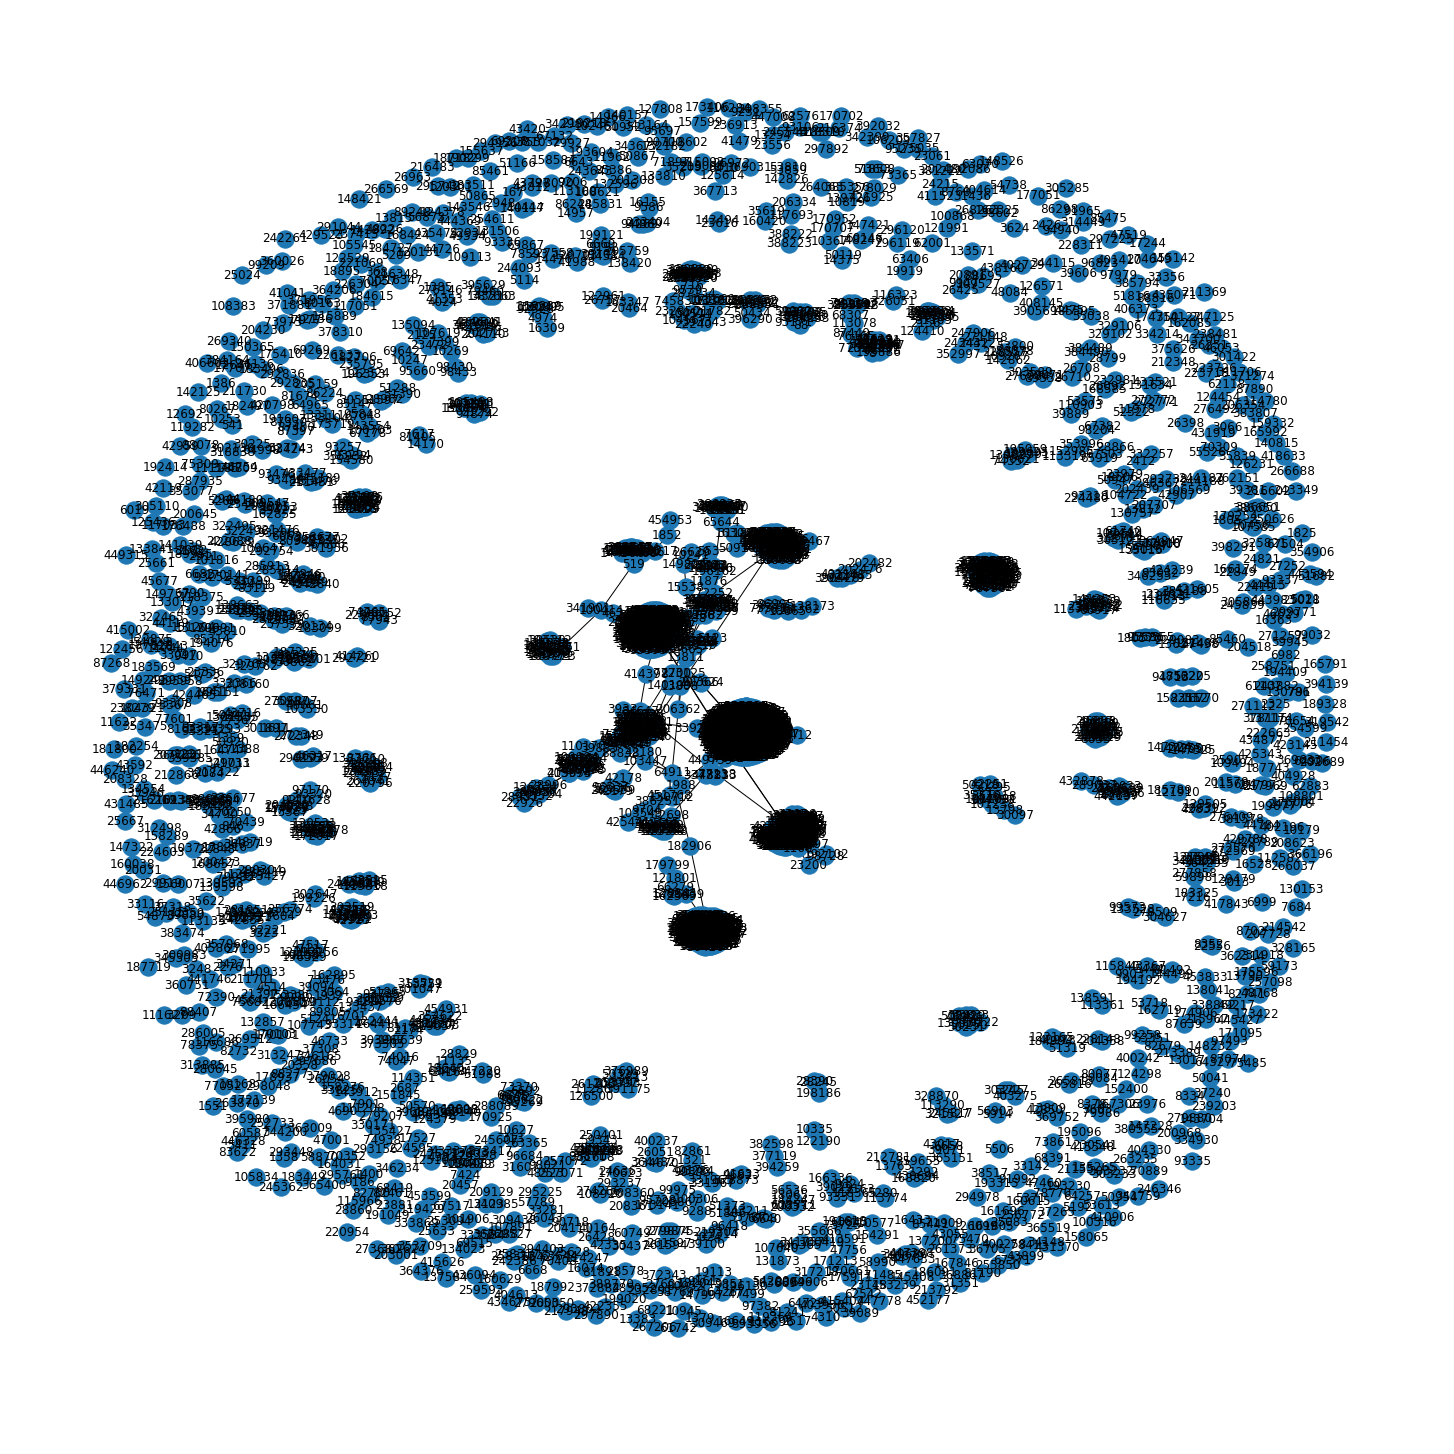

In [ ]:
plt.figure(figsize=(20, 20))
nx.draw(G_train, with_labels = True)

In [ ]:
edge_subset_size = len(list(edge_subset))
print("Deleted edges =", str(edge_subset_size))
print("Remaining edges =", str(m - edge_subset_size))

# just printing the edge_subset.
print(edge_subset)

Deleted edges = 505
Remaining edges = 2024
[('250519', '118927'), ('250519', '423158'), ('4665', '140109'), ('250519', '442999'), ('27682', '55921'), ('17871', '171145'), ('26486', '69308'), ('303233', '303232'), ('60350', '77700'), ('38790', '115966'), ('109267', '142862'), ('26486', '104059'), ('290304', '125419'), ('21782', '393343'), ('250519', '365400'), ('250519', '405018'), ('202479', '325485'), ('53575', '110903'), ('250519', '238743'), ('250519', '449759'), ('250519', '125640'), ('27682', '178935'), ('1134', '153003'), ('17939', '211640'), ('115818', '43515'), ('250519', '195999'), ('332366', '308160'), ('414901', '62542'), ('63931', '5506'), ('250519', '365499'), ('26486', '51638'), ('553', '26629'), ('41152', '24215'), ('133435', '93293'), ('250519', '394570'), ('301897', '1611'), ('21606', '333023'), ('5438', '54312'), ('250519', '234305'), ('250519', '208355'), ('1134', '201307'), ('113290', '328870'), ('1988', '449759'), ('250519', '239829'), ('716', '201607'), ('2156', '

In [ ]:
print(G_train.number_of_edges())
g.number_of_edges()

2024


2529

##Adamic-Adar Similarity

In [ ]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [ ]:
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

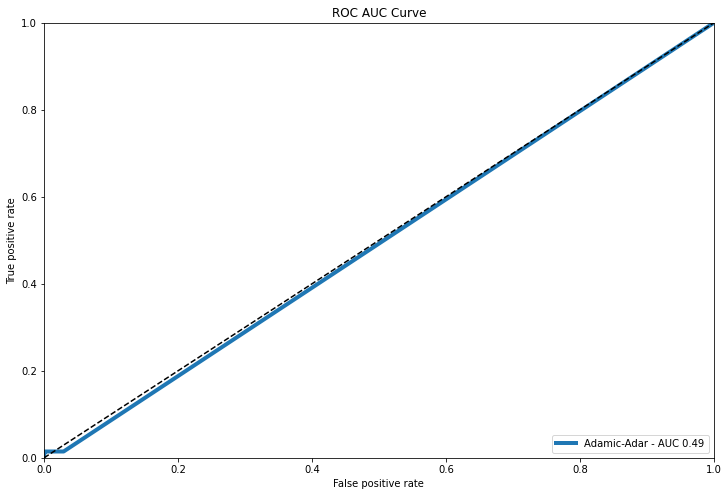

In [ ]:
plt.figure(figsize=(12, 8))
#plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
#plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

##Link Prediction between two active users using GraphML

In [ ]:
!pip install torch-scatter
!pip install torch-sparse
!pip install torch-cluster
!pip install torch-spline-conv
!pip install torch-geometric

In [ ]:
import os.path as osp

import torch
from sklearn.metrics import roc_auc_score

import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv,SAGEConv,GATConv
from torch_geometric.utils import negative_sampling
from sklearn.preprocessing import StandardScaler

In [ ]:
import torch
from torch_geometric.utils.convert import from_networkx

In [ ]:
pyg_graph = from_networkx(G_RT)

print(pyg_graph)
# Data(edge_index=[2, 12], x=[5], y=[5])
print(pyg_graph.x)
# tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
print(pyg_graph.y)
# tensor([1, 2, 3, 4, 5])
print(pyg_graph.edge_index)
# tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
#         [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])

Data(edge_index=[2, 5058], num_nodes=2903)
None
None
tensor([[   0,    0,    1,  ..., 2900, 2901, 2902],
        [   1,    2,    0,  ..., 1551, 1506, 1094]])


In [ ]:
g=G_RT

In [ ]:
dataset = pyg_graph
embeddings = np.array(list(dict(g.degree()).values()))

# normalizing degree values
scale = StandardScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))
dataset.x = torch.from_numpy(embeddings).type(torch.float32)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
transform = T.Compose([
    T.NormalizeFeatures(),
    T.ToDevice(device),
    T.RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True,
                      add_negative_train_samples=False),
])
data=transform(dataset)

In [ ]:
train_data, val_data, test_data = data

In [ ]:
train_data.num_features

1

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()

In [ ]:
model = Net(train_data.num_features, 128, 64).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()


In [ ]:
def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(train_data.x, train_data.edge_index)

    # We perform a new round of negative sampling for every training epoch:
    neg_edge_index = negative_sampling(
        edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
        num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

    edge_label_index = torch.cat(
        [train_data.edge_label_index, neg_edge_index],
        dim=-1,
    )
    edge_label = torch.cat([
        train_data.edge_label,
        train_data.edge_label.new_zeros(neg_edge_index.size(1))
    ], dim=0)

    out = model.decode(z, edge_label_index).view(-1)
    loss = criterion(out, edge_label)
    loss.backward()
    optimizer.step()
    return loss


@torch.no_grad()
def test(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())


best_val_auc = final_test_auc = 0
for epoch in range(1, 101):
    loss = train()
    val_auc = test(val_data)
    test_auc = test(test_data)
    if val_auc > best_val_auc:
        best_val = val_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_auc:.4f}, '
          f'Test: {test_auc:.4f}')

print(f'Final Test: {final_test_auc:.4f}')

z = model.encode(test_data.x, test_data.edge_index)
final_edge_index = model.decode_all(z)

Epoch: 001, Loss: 0.6901, Val: 0.8750, Test: 0.8953
Epoch: 002, Loss: 0.6447, Val: 0.9001, Test: 0.9218
Epoch: 003, Loss: 0.5730, Val: 0.9269, Test: 0.9451
Epoch: 004, Loss: 0.5807, Val: 0.9294, Test: 0.9457
Epoch: 005, Loss: 0.6030, Val: 0.9238, Test: 0.9423
Epoch: 006, Loss: 0.5627, Val: 0.9115, Test: 0.9326
Epoch: 007, Loss: 0.5509, Val: 0.9022, Test: 0.9237
Epoch: 008, Loss: 0.5627, Val: 0.8941, Test: 0.9201
Epoch: 009, Loss: 0.5695, Val: 0.8998, Test: 0.9227
Epoch: 010, Loss: 0.5642, Val: 0.9068, Test: 0.9276
Epoch: 011, Loss: 0.5507, Val: 0.9109, Test: 0.9327
Epoch: 012, Loss: 0.5404, Val: 0.9178, Test: 0.9384
Epoch: 013, Loss: 0.5439, Val: 0.9178, Test: 0.9387
Epoch: 014, Loss: 0.5521, Val: 0.9177, Test: 0.9375
Epoch: 015, Loss: 0.5465, Val: 0.9107, Test: 0.9321
Epoch: 016, Loss: 0.5326, Val: 0.9077, Test: 0.9273
Epoch: 017, Loss: 0.5336, Val: 0.9025, Test: 0.9239
Epoch: 018, Loss: 0.5370, Val: 0.9022, Test: 0.9220
Epoch: 019, Loss: 0.5402, Val: 0.9027, Test: 0.9233
Epoch: 020, 